<a href="https://colab.research.google.com/github/areenkun/tools/blob/main/tools_areen_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://github.com/shirooo39/MiXLab" target="_blank">
<img src="https://github.com/fluidicon.png" height="100px" align="left"></a>

# <font size=6><center>**Welcome to Areen's Lab!**</center></font>

<font size=4><center>This Notebook is a stripped down version of <a href="https://areenkun.blogspot.com/" target="_blank">tools@areen_</a>.</center></font>

## Crash Colab to clear all RAM

In [ ]:
#@title ← ឵឵ ឵Run this cell to crash your current Runtime if you're low on memory
#@markdown <i>After crashing, you'll have access to all the preoccupied storage. Then it'll help you for Rclone cache file storage increase (Recommend for a first run this cell) </i>
some_str = ' ' * 5120000000000

## <font size=6><center>✦ *Login G-drive* ✦</center></font>
---

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## <font size=6><center>✦ *Colab Stay Alive* ✦</center></font>
---

In [ ]:
# ============================= FORM ============================= #
# @markdown <font size=5>← [Start] Colab Stay Alive</font>
# @markdown This cell runs a JS code that will automatically press the reconnect button when you got disconnected due to idle.
# ================================================================ #

import IPython
from IPython.display import clear_output
from google.colab import output

display(IPython.display.Javascript('''
 function ClickConnect(){
   btn = document.querySelector("colab-connect-button")
   if (btn != null){
     console.log("Clicked on the connect button"); 
     btn.click() 
     }
   
   btn = document.getElementById('connect')
   if (btn != null){
     console.log("Clicked on the reconnect button"); 
     btn.click() 
     }
  }
  
setInterval(ClickConnect,60000)
'''))

clear_output()

In [ ]:
while True:pass

# **Install ffmpeg**

You need to install [ffmpeg](https://ffmpeg.org), a cross-platform solution to record, convert and stream audio and video. Just run the cell to install.

In [ ]:
!sudo apt update && sudo apt install ffmpeg

# <font size=6><center>✦ *OpenAI's Whisper* ✦</center></font>
---

In [ ]:
!pip install git+https://github.com/m1guelpf/yt-whisper.git

In [ ]:
!yt_whisper "https://www.youtube.com/watch?v=dQw4w9WgXcQ" --language English --model large

## Install Whisper

This step will install the latest commit from the OpenAI repository on Github. Just run the cell below to install.



In [ ]:
!pip install git+https://github.com/openai/whisper.git
!pip install gradio

## **Clone git**

In [ ]:
!pip install git+https://github.com/m1guelpf/auto-subtitle.git
!git clone https://github.com/tomchang25/whisper-auto-transcribe.git && cd whisper-auto-transcribe

## **Reinstall CPU**

In [ ]:
!pip uninstall torch torchvision torchaudio --yes
!pip install spleeter
!pip install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu113

## **Upload Your File**

Open the file folder on the left-hand corner of your Colab notebook. Drag the .mp3 you would like to transcribe into the "Files" section. 

This will upload the audio to your your Google Drive. Here's what it looks like once you've uploaded a file:

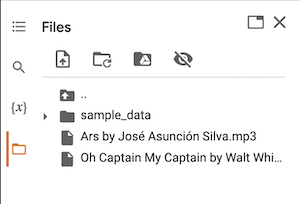




## Start Transcribe

output in "/tmp"

In [ ]:
!auto_subtitle "/content/drive/Shareddrives/Areen # Various Anime Releases/_temp_/khitobah_fan.opus" -o "/content/drive/Shareddrives/Areen # Various Anime Releases/_temp_/" --model large --task transcribe

In [ ]:
!python /content/whisper-auto-transcribe/cli.py "/content/drive/Shareddrives/Areen # Various Anime Releases/_temp_/khitobah_fan.opus"  --output "/content/drive/Shareddrives/Areen # Various Anime Releases/_temp_/khitobah_fan.ar.srt" --model large

## Transcribe & Translate (Optional)

To translate an .mp3, simply copy and paste the title of your .mp3 file into the command line below and run the cell. 

You can change the language as needed in the command line, and English is the default output. Don't forget the quotation marks! 

Note: I created and successfully ran every step of this notebook with my Colab Pro subscription. 

On the basic Google Colab plan, all the steps worked except "Step Five." This final step kept getting a "Runtime discontinued" error on the basic plan.

In [ ]:
!whisper "/content/drive/Shareddrives/TestOnlyFuckUv8/z!trash/Audio Unit 9-20221025/A1_at_the_library.mp3" --language english --model large
!whisper "Ars by José Asunción Silva.mp3" --language Spanish --task translate

# <font size=6><center>✦ *Compress/Decompress Files* ✦</center></font>
---

## <font size=6>Create/Extract Archive</font>

In [ ]:
# ============================= FORM ============================= #
# @markdown <font size=5>← Create Archive</font>
MODE = "ZIP" #@param ["ZIP", "TAR", "7Z"]
FILENAME = ""  # @param {type:"string"}
PATH_TO_FILE = ""  # @param {type:"string"}
ARCHIVE_PASSWORD = "" #@param {type:"string"}

# option supports b k m g (bytes, kilobytes, megabytes, gigabytes)
SPLIT = "no" #@param ["1g", "2g", "3g", "4g", "5g", "no"]

compress = 4#@param  {type:"slider", min:0, max:9, step:0}
#@markdown > Use the character `|` to separate paths. (Example `path/to /1 | path/to/2`)
# ================================================================ #

from pathlib import PurePosixPath

pathList = PATH_TO_FILE.split('|')
if MODE == "ZIP":
    if not FILENAME:
      FILENAME = "/content/NEW_FILE.ZIP"
    if ARCHIVE_PASSWORD:
      passADD = f'--password "{ARCHIVE_PASSWORD}"'
    else:
      passADD = ''
    splitC = f"-s {SPLIT}" if not 'no' in SPLIT else "" 
    for part in pathList:
      pathdic = PurePosixPath(part.strip())
      parent = pathdic.parent
      partName = pathdic.parts[-1]
      cmd = f'cd "{parent}" && zip {passADD} -{compress} {splitC} -v -r -u "{FILENAME}" "{partName}"'
      !$cmd
elif MODE == "TAR":
    if not FILENAME:
      FILENAME = "/content/NEW_FILE"
    cmd = f'GZIP=-{compress} tar -zcvf "{FILENAME}.tar.gz" {PATH_TO_FILE}'
    !$cmd
else:
    if not FILENAME:
        FILENAME = "/content/NEW_FILE"
    for part in pathList:
      pathdic = PurePosixPath(part.strip())
      parent = pathdic.parent
      partName = pathdic.parts[-1]
      cmd = f'cd "{parent}" && 7z a -mx={compress} "{FILENAME}.7z" "{partName}"'
      !$cmd


In [ ]:
# ============================= FORM ============================= #
# @markdown <font size=5>← Extract Archive</font>
MODE = "7Z"  # @param ["UNZIP", "UNTAR", "UNRAR", "7Z"]
PATH_TO_FILE = ""  # @param {type:"string"}
extractPath = ""  # @param {type:"string"}
ARCHIVE_PASSWORD = "" #@param {type:"string"}
# ================================================================ #

import os, urllib.request
HOME = os.path.expanduser("~")

if not os.path.exists(f"{HOME}/.ipython/mixlab.py"):
    hCode = "https://raw.githubusercontent.com/shirooo39/" \
                "MiXLab/master/resources/mixlab.py"
    urllib.request.urlretrieve(hCode, f"{HOME}/.ipython/mixlab.py")

from mixlab import (
    runSh,
    checkAvailable,
)

def extractFiles():
    global extractPath
    if ARCHIVE_PASSWORD:
      passADD = f'-P {ARCHIVE_PASSWORD}'
    else:
      passADD = ''
    if not extractPath:
      extractPath = "/content/extract"
    os.makedirs(extractPath, exist_ok=True)
    if MODE == "UNZIP":
        runSh('unzip '+passADD+f' "{PATH_TO_FILE}" -d "{extractPath}"', output=True)
    elif MODE == "UNRAR":
        runSh(f'unrar x "{PATH_TO_FILE}" "{extractPath}" '+passADD+' -o+', output=True)
    elif MODE == "UNTAR":
        runSh(f'tar -C "{extractPath}" -xvf "{PATH_TO_FILE}"', output=True)
    else:
        runSh(f'7z x "{PATH_TO_FILE}" -o{extractPath} '+passADD, output=True)

extractFiles()

In [ ]:
# ============================= FORM ============================= #
# @markdown <font size=5>← Install the Requirements</font>
# ================================================================ #

import IPython
from IPython.display import clear_output

!sudo apt-get install aria2 cabextract wimtools chntpw genisoimage
!git clone https://github.com/uup-dump/converter "/content/tools/uup-dump/converter"

clear_output()

In [ ]:
# ============================= FORM ============================= #
# @markdown <font size=5>← [Start] UUP Dump</font>
script_location = "" #@param {type:"string"}
# @markdown > Only type in the script's path and exclude the script's name.<br><br>Type in: /content/path/to/script<br>Exclude: uup_download_linux.sh
# ================================================================ #

if not script_location == "":
    pass
else:
    script_location = "/content"

%cd "$script_location"

!bash "uup_download_linux.sh"

%cd "/content"

In [ ]:
# ============================= FORM ============================= #
# Custom commands goes here
# ================================================================ #



TO DO:

- Add files and paths checker ot make sure they are exist

In [ ]:
## **<font color="red">Important note</font> - After doing all the steps, please note that depending on your file size of the Zip and Rar files, it may take a while to show up in your Google Drive. Please be patient. Eventually, it will show up in your drive.**
###**<font color="red">For larger files</font> - it may take some time to show up in your Google Drive. Do not rerun the code if it doesn't show up fast. Just keep refreshing your Google Drive page to see if it shows up**
###**<font color="red">For small files</font> - it will show up quicker in your Google Drive. Just wait until it shows up. Just keep refreshing your page to see if it shows up**
###**<font color="red">Update</font> - added some features**
* Extract/create password protected rar files
* Extract/create tar/tar.gz/tar/bz files


##__Unzip/Unrar/Untar Files__

###__Unzip Files__



*   First path in below cell - Your Google Drive file location which you want to Unzip
*   Second path in below cell - Path where you want to extract the zip file in Google Drive

In [ ]:
!unzip "/content/drive/path/input_file_name.zip" -d "/content/drive/path/output_folder/"

###__Unrar Files</center>__





*   First path in below cell - Your Google Drive file location which you want to Unrar
*   Second path in below cell - Path where you want to extract the rar file in Google Drive

*If you want to extract a password protected rar file, then add "-Y" flag or Use this command instead of the command in the cell
(replace the command with the command in the cell)*

* ```
!unrar x -Y "/content/drive/path/input_file_name.rar" "/content/drive/path/output_folder/"
```





In [ ]:
!unrar x "/content/drive/path/input_file_name.rar" "/content/drive/path/output_folder/"

###__Untar Files__



*   First path in below cell - Your Google Drive file location which you want to Untar
*   Second path in below cell - Path where you want to extract the tar file in Google Drive

 *__Flags__*

 * -x : Extract a tar ball.
 * -v : Verbose output or show progress while extracting files.
 * -f : Specify an archive or a tarball filename.
 * -C : Specify a different directory to extract
 * -z : Decompress and extract the contents of the compressed archive created by gzip program (tar.gz extension).
 * -j : Decompress and extract the contents of the compressed archive created by bzip2 program (tar.bz2 extension).

In [ ]:
!tar -xvf "/content/drive/path/input_file_name.tar" -C "/content/drive/path/output_folder/"     #[run this cell to extract tar files]

In [ ]:
!tar -xzvf "/content/drive/path/input_file_name.tar.gz" -C "/content/drive/path/output_folder/"     #[run this cell to extract tar.gz files]

In [ ]:
!tar -xjvf "/content/drive/path/input_file_name.tar.bz2" -C "/content/drive/path/output_folder/"     #[run this cell to extract tar.bz2 files]

##__Zip/Rar/Tar Files/Folders__

###__Zip Files/Folders__



*   First path in below cell - Your Zip output filename
*   Second path in below cell - Google Drive file location of the files which you want to Zip

In [ ]:
!zip "/content/drive/path/output_file_name.zip" "/content/drive/My Drive/Tutorial/games"

###__Rar Files/Folders__





In [ ]:
# <= Click this cell to rar the folder

!apt-get install rar

*   First path in below cell - Your Rar File output Name (do not put .rar at the end. It will take it automatically)
*   Second path in below cell - Google Drive file location of the files/folder which you want to Rar

*If you want to create a password protected rar file, then add "-p" flag or Use this command instead of the command in in the cell.
(replace the command with the command in the cell) After running the cell, it will ask you to provide the password*

* ```
!rar a -p "/content/drive/path/output_file_name" "/content/drive/path/input_file_or_folder"
```

In [ ]:
!rar a "/content/drive/path/output_file_name" "/content/drive/path/input_file_or_folder"

###__Tar Files/Folders__



*   First path in below cell - Your Tar output filename
*   Second path in below cell - Google Drive file location of the files which you want to Tar

 *__Flags__*

 * -c : Create a new archive
 * -v : Verbose output
 * -f : Use the given archive file (name.extention)
 * -z : Filter the archive through gzip
 * -j : Filter the archive through bzip2

In [ ]:
!tar -cvf "/content/drive/path/output_file_name.tar" "/content/drive/path/input_file_or_folder"     #[run this cell to create tar files]

In [ ]:
!tar -czvf "/content/drive/path/output_file_name.tar.gz" "/content/drive/path/input_file_or_folder"     #[run this cell to create tar.gz files]

In [ ]:
!tar -cjvf "/content/drive/path/output_file_name.tar.bz2" "/content/drive/path/input_file_or_folder"      #[run this cell to create tar.bz2 files]

# <font size=6><center>✦ *utilities@areen_* ✦</center></font>
---


## <font size=6><center>✦ *aria2* ✦</center></font>
---


## <font size=6><center>✦ *auto-editor* ✦</center></font>
---


In [ ]:
!pip3 install auto-editor

In [ ]:
!auto-editor "/content/drive/Shareddrives/TestOnlyFuckUv8/z!trash/_old_/.temp/Arinal Haq_210104110061_UTS.mp4"

## <font size=6><center>✦ *Speed Up Video* ✦</center></font>
---
atempo=[speed]

In [ ]:
!ffmpeg -i "/content/drive/Shareddrives/TestOnlyFuckUv8/z!trash/_old_/.temp/Arinal Haq_210104110061_UTS_ALTERED.mp4" -hide_banner -loglevel error -filter_complex "[0:v]setpts=0.75*PTS[v];[0:a]atempo=1.25[a]" -map "[v]" -map "[a]" "/content/drive/Shareddrives/TestOnlyFuckUv8/z!trash/_old_/.temp/Arinal Haq_210104110061_UTS_ALTERED_.mp4"

## <font size=6><center>✦ *qobuz-dl* ✦</center></font>
---


## **MEGA Download**

In [ ]:
# @markdown <center><h2>INPUT YOUR MEGA ID</h2></center><br>
from functools import wraps
import errno
import os
import signal
import subprocess
import shlex


class TimeoutError(Exception):
    pass


def timeout(seconds=10, error_message=os.strerror(errno.ETIME)):
    def decorator(func):
        def _handle_timeout(signum, frame):
            raise TimeoutError(error_message)

        def wrapper(*args, **kwargs):
            signal.signal(signal.SIGALRM, _handle_timeout)
            signal.alarm(seconds)
            try:
                result = func(*args, **kwargs)
            finally:
                signal.alarm(0)
            return result

        return wraps(func)(wrapper)

    return decorator


if not os.path.exists("/root/.ipython/ocr.py"):
    from subprocess import run
    from shlex import split

    shellCmd = "wget -qq https://raw.githubusercontent.com/biplobsd/OneClickRun/master/res/ocr.py \
                    -O /root/.ipython/ocr.py"
    run(split(shellCmd))
from ocr import runSh

@timeout(10)
def runShT(args):
    return runSh(args, output=True)


# MEGAcmd installing
if not os.path.exists("/usr/bin/mega-cmd"):
    print("Installing MEGA ...")
    runSh('sudo apt-get -y update')
    runSh('sudo apt-get -y install libmms0 libc-ares2 libc6 libcrypto++6 libgcc1 libmediainfo0v5 libpcre3 libpcrecpp0v5 libssl1.1 libstdc++6 libzen0v5 zlib1g apt-transport-https')
    runSh('sudo curl -sL -o /var/cache/apt/archives/MEGAcmd.deb https://mega.nz/linux/MEGAsync/Debian_9.0/amd64/megacmd-Debian_9.0_amd64.deb', output=True)
    runSh('sudo dpkg -i /var/cache/apt/archives/MEGAcmd.deb', output=True)
    print("MEGA is installed.")
else:
    !pkill mega-cmd

# INPUT YOUR MEGA ID

USERNAME = "arikucinggila@gmail.com"  # @param {type:"string"}
PASSWORD = "arinal2001"  # @param {type:"string"}
if not (USERNAME == "" or PASSWORD == ""):
    try:
        runShT(f"mega-login {USERNAME} {PASSWORD}")
    except TimeoutError:
        runSh('mega-whoami', output=True)
else:
    print("Please Input your Mega IDs.")


In [ ]:
import sys, os, urllib.request
import time
import subprocess
import contextlib
from IPython.display import clear_output

HOME = os.path.expanduser("~")
if not os.path.exists(f"{HOME}/.ipython/ocr.py"):
    hCode = "https://raw.githubusercontent.com/biplobsd/" \
                "OneClickRun/master/res/ocr.py"
    urllib.request.urlretrieve(hCode, f"{HOME}/.ipython/ocr.py")

from ocr import (
    runSh,
    loadingAn,
)
#@title MEGA public link download
URL = "https://mega.nz/folder/ecwnEQAK#aUlpWTkOvxtOSGEKrUvFAQhttps" #@param {type:"string"}
OUTPUT_PATH = "/content/drive/Shareddrives/Areen # Various Anime Releases/_main-list_" #@param {type:"string"}
if not OUTPUT_PATH:
  os.makedirs("downloads", exist_ok=True)
  OUTPUT_PATH = "downloads"
# MEGAcmd installing
if not os.path.exists("/usr/bin/mega-cmd"):
    loadingAn()
    print("Installing MEGA ...")
    runSh('sudo apt-get -y update')
    runSh('sudo apt-get -y install libmms0 libc-ares2 libc6 libcrypto++6 libgcc1 libmediainfo0v5 libpcre3 libpcrecpp0v5 libssl1.1 libstdc++6 libzen0v5 zlib1g apt-transport-https')
    runSh('sudo curl -sL -o /var/cache/apt/archives/MEGAcmd.deb https://mega.nz/linux/MEGAsync/Debian_9.0/amd64/megacmd-Debian_9.0_amd64.deb', output=True)
    runSh('sudo dpkg -i /var/cache/apt/archives/MEGAcmd.deb', output=True)
    print("MEGA is installed.")
    clear_output()

# Unix, Windows and old Macintosh end-of-line
newlines = ['\n', '\r\n', '\r']

def unbuffered(proc, stream='stdout'):
    stream = getattr(proc, stream)
    with contextlib.closing(stream):
        while True:
            out = []
            last = stream.read(1)
            # Don't loop forever
            if last == '' and proc.poll() is not None:
                break
            while last not in newlines:
                # Don't loop forever
                if last == '' and proc.poll() is not None:
                    break
                out.append(last)
                last = stream.read(1)
            out = ''.join(out)
            yield out


def transfare():
    import codecs
    decoder = codecs.getincrementaldecoder("UTF-8")()
    cmd = ["mega-get", URL, OUTPUT_PATH]
    proc = subprocess.Popen(
        cmd,
        stdout=subprocess.PIPE,
        stderr=subprocess.STDOUT,
        # Make all end-of-lines '\n'
        universal_newlines=True,
    )
    for line in unbuffered(proc):
        print(line)
        


transfare()



##<img src='https://raw.githubusercontent.com/biplobsd/OneClickRun/master/img/zip.png' height="30" alt="netdata"> __Extracte/Archive Zip/Tar/Rar__

In [ ]:
# ============================= FORM ============================= #
# @markdown #### ⬅️ Extract Files
MODE = "7Z"  # @param ["UNZIP", "UNTAR", "UNRAR", "7Z"]
PATH_TO_FILE = ""  # @param {type:"string"}
extractPath = ""  # @param {type:"string"}
ARCHIVE_PASSWORD = "" #@param {type:"string"}

# ================================================================ #
import os, urllib.request
HOME = os.path.expanduser("~")

if not os.path.exists(f"{HOME}/.ipython/ocr.py"):
    hCode = "https://raw.githubusercontent.com/biplobsd/" \
                "OneClickRun/master/res/ocr.py"
    urllib.request.urlretrieve(hCode, f"{HOME}/.ipython/ocr.py")

from ocr import (
    runSh,
    checkAvailable,
)

def extractFiles():
    global extractPath
    if ARCHIVE_PASSWORD:
      passADD = f'-P {ARCHIVE_PASSWORD}'
    else:
      passADD = ''
    if not extractPath:
      extractPath = "/content/extract"
    os.makedirs(extractPath, exist_ok=True)
    if MODE == "UNZIP":
        runSh('unzip '+passADD+f' "{PATH_TO_FILE}" -d "{extractPath}"', output=True)
    elif MODE == "UNRAR":
        runSh(f'unrar x "{PATH_TO_FILE}" "{extractPath}" '+passADD+' -o+', output=True)
    elif MODE == "UNTAR":
        runSh(f'tar -C "{extractPath}" -xvf "{PATH_TO_FILE}"', output=True)
    else:
        runSh(f'7z x "{PATH_TO_FILE}" -o{extractPath} '+passADD, output=True)


extractFiles()

In [ ]:
# ============================= FORM ============================= #
# @markdown #### ⬅️ Archive Files
MODE = "ZIP" #@param ["ZIP", "TAR", "7Z"]
FILENAME = ""  # @param {type:"string"}
PATH_TO_FILE = ""  # @param {type:"string"}
ARCHIVE_PASSWORD = "" #@param {type:"string"}

# option supports b k m g (bytes, kilobytes, megabytes, gigabytes)
SPLIT = "no" #@param ["1g", "2g", "3g", "4g", "5g", "no"]


compress = 4#@param  {type:"slider", min:0, max:9, step:0}
#@markdown <font size=2%>Use this to path separate between to this character `|`. Ex `path/to /1 | path/to/2` </br>#Split only in zip mode.(Only for noobs)
# ================================================================ #
from pathlib import PurePosixPath

pathList = PATH_TO_FILE.split('|')
if MODE == "ZIP":
    if not FILENAME:
      FILENAME = "/content/NEW_FILE.ZIP"
    if ARCHIVE_PASSWORD:
      passADD = f'--password "{ARCHIVE_PASSWORD}"'
    else:
      passADD = ''
    splitC = f"-s {SPLIT}" if not 'no' in SPLIT else "" 
    for part in pathList:
      pathdic = PurePosixPath(part.strip())
      parent = pathdic.parent
      partName = pathdic.parts[-1]
      cmd = f'cd "{parent}" && zip {passADD} -{compress} {splitC} -v -r -u "{FILENAME}" "{partName}"'
      !$cmd
elif MODE == "TAR":
    if not FILENAME:
      FILENAME = "/content/NEW_FILE"
    cmd = f'GZIP=-{compress} tar -zcvf "{FILENAME}.tar.gz" {PATH_TO_FILE}'
    !$cmd
else:
    if not FILENAME:
        FILENAME = "/content/NEW_FILE"
    for part in pathList:
      pathdic = PurePosixPath(part.strip())
      parent = pathdic.parent
      partName = pathdic.parts[-1]
      cmd = f'cd "{parent}" && 7z a -mx={compress} "{FILENAME}.7z" "{partName}"'
      !$cmd


In [ ]:
!pip3 install --upgrade qobuz-dl
!!cp "/content/drive/MyDrive/Backup/config.ini" "/root/.config/qobuz-dl/"
!qobuz-dl -h

--albums-only

In [ ]:
!qobuz-dl dl https://open.qobuz.com/artist/3957383 --albums-only --no-db

In [ ]:
!cp "/content/qobuz-dl/Ikimonogakari" "/content/drive/Shareddrives/Areen #Music/qobuz-dl/"

# <font size=6><center>✦ *Download Manager* ✦</center></font>

## <img src='https://raw.githubusercontent.com/biplobsd/OneClickRun/master/img/aria2cli.png' height="45" alt="aira2"/> <font size=1px >___Direct link downloader___</font>

___Auto share link supported : Disk.yandex.com, Gdrive and youtube-dl all extractor...___

In [ ]:
URL = "" #@param {type:"string"}
#@markdown <center><h5>Default output path /content/downloads/</h5></center>
OUTPUT_PATH = "" #@param {type:"string"}

import pathlib
import shutil
import hashlib
import requests
from urllib.parse import urlparse
from os import path, mkdir
if not path.exists("/root/.ipython/ocr.py"): 
    from subprocess import run
    from shlex import split

    shellCmd = "wget -qq https://raw.githubusercontent.com/biplobsd/" \
                "OneClickRun/master/res/ocr.py \
                    -O /root/.ipython/ocr.py"
    run(split(shellCmd))
from ocr import runSh

def youtubedlInstall():
  if not path.isfile("/usr/local/bin/youtube-dl"):
    cmdC = "rm -rf /content/sample_data/ && " \
            " mkdir -p -m 666 /root/.YouTube-DL/ &&" \
            " apt-get install atomicparsley &&" \
            " curl -L https://yt-dl.org/downloads/latest/youtube-dl " \
            "-o /usr/local/bin/youtube-dl &&" \
            " chmod a+rx /usr/local/bin/youtube-dl"
    get_ipython().system_raw(cmdC)

def aria2Install():
  runSh('apt install -y aria2')

def istmd(URL): 
  link = urlparse(URL)
    
  #YandexDisk
  if link.netloc == "yadi.sk":
    API_ENDPOINT = 'https://cloud-api.yandex.net/v1/disk/public/resources/' \
                    '?public_key={}&path=/{}&offset={}'
    dry = False
    def md5sum(file_path):
        md5 = hashlib.md5()
        with open(file_path, 'rb') as f:
            for chunk in iter(lambda: f.read(128 * md5.block_size), b''):
                md5.update(chunk)
        return md5.hexdigest()


    def check_and_download_file(target_path, url, size, checksum):
        if path.isfile(target_path):
            if size == path.getsize(target_path):
                if checksum == md5sum(target_path):
                    print('URL {}'.format(url))
                    print('skipping correct {}'.format(target_path))
                    return
        if not dry:
            print('URL {}'.format(url))
            print('downloading {}'.format(target_path))
            runSh(f'aria2c -x 16 -s 16 -k 1M -d {OUTPUT_PATH} {url}', output=True)
            # r = requests.get(url, stream=True)
            # with open(target_path, 'wb') as f:
            #     shutil.copyfileobj(r.raw, f)


    def download_path(target_path, public_key, source_path, offset=0):
        print('getting "{}" at offset {}'.format(source_path, offset))
        current_path = path.join(target_path, source_path)
        pathlib.Path(current_path).mkdir(parents=True, exist_ok=True)
        jsn = requests.get(API_ENDPOINT.format(public_key, source_path, offset)).json()
        def try_as_file(j):
            if 'file' in j:
                file_save_path = path.join(current_path, j['name'])
                check_and_download_file(file_save_path, j['file'], j['size'], j['md5'])
                return True
            return False

        # first try to treat the actual json as a single file description
        if try_as_file(jsn):
            return

        # otherwise treat it as a directory
        emb = jsn['_embedded']
        items = emb['items']
        for i in items:
            # each item can be a file...
            if try_as_file(i):
                continue
            # ... or a directory
            else:
                subdir_path = path.join(source_path, i['name'])
                download_path(target_path, public_key, subdir_path)

        # check if current directory has more items
        last = offset + emb['limit']
        if last < emb['total']:
            download_path(target_path, public_key, source_path, last)
    download_path(OUTPUT_PATH, URL, '')
    return False  
  return URL

if not OUTPUT_PATH:
  OUTPUT_PATH = "/content/downloads/"
  
if not URL == "":
  aria2Install()
  youtubedlInstall()
  try:
    mkdir("downloads")
  except FileExistsError:
    pass
  url = istmd(URL)
  if url != False:
    print('URL {}'.format(URL))
    cmdC = f'youtube-dl -o "{OUTPUT_PATH}/%(title)s" {URL} ' \
            '--external-downloader aria2c ' \
            '--external-downloader-args "-x 16 -s 16 -k 1M"'
    runSh(cmdC, output=True)
else:
  print("Please input url")

# <font size=6 color=red><center>✦ *EXPERIMENTAL* ✦</center></font>

<font size=4 color=red><center>**Everything in this section is in EXPERIMENTAL state and/or UNFINISHED and/or LEFT AS IS!  
Any issue regarding this section will be IGNORED!**</center></font>

## <font size=6>FFMPEG 1</font>
<font size=4 color=red>GPU runtime needed!</font>

### ***Required to use Scripts:*** Install FFmpeg, VCSI & Mkvtoolnix

In [ ]:
#@markdown <h3>← Click Here to Install FFmpeg, VCSI, Mkvtoolnix, Firefox, Furiousmount & Handbrake</h3>

#@title <font size="5">← ឵឵<i>Upgrade FFmpeg to v4.2.2</font> { vertical-output: true }
from IPython.display import clear_output
import os, urllib.request
HOME = os.path.expanduser("~")
pathDoneCMD = f'{HOME}/doneCMD.sh'
if not os.path.exists(f"{HOME}/.ipython/ttmg.py"):
    hCode = "https://raw.githubusercontent.com/totalleecher/" \
                "Google-Colab-CloudTorrent/master/res/ttmg.py"
    urllib.request.urlretrieve(hCode, f"{HOME}/.ipython/ttmg.py")

from ttmg import (
    loadingAn,
    textAn,
)

loadingAn(name="lds")
textAn("Installing Dependencies...", ty='twg')
#os.system('pip install git+git://github.com/AWConant/jikanpy.git') //GPU Not supported
#os.system('add-apt-repository -y ppa:jonathonf/ffmpeg-4') //GPU Not supported
os.system('apt-get update')
os.system('apt-get install ffmpeg')
os.system('apt-get install mkvtoolnix')
os.system('pip install vcsi')
#os.system('sudo apt-get install synaptic')
#os.system('sudo apt install firefox')
os.system('sudo add-apt-repository ppa:stebbins/handbrake-releases -y')
os.system('sudo apt update -y')
os.system('sudo apt install --install-recommends handbrake-gtk handbrake-cli')
#os.system('sudo apt-get install furiusisomount')

clear_output()
print("Install Finished")

### » Re-encode a Video to a Different Resolution (*H265*) - Need GPU - Nvidia Telsa P100 or T4 (Support Both Single & Batch Processing)

In [ ]:
#@title Check GPU
#@markdown Run this to connect to a Colab Instance, and see what GPU Google gave you.

gpu = !nvidia-smi --query-gpu=gpu_name --format=csv
print(gpu[1])
print("The Tesla T4 and P100 are fast and support hardware encoding. The K80 and P4 are slower.")
print("Sometimes resetting the instance in the 'runtime' tab will give you a different GPU.")

In [ ]:
path = "" #@param {type:"string"}
save_txt = False #@param {type:"boolean"}
import os, uuid, re, IPython
import ipywidgets as widgets
import time

from glob import glob
from IPython.display import HTML, clear_output
from google.colab import output, drive

def mediainfo():
  display(HTML("<br>"))
#   print(path.split("/")[::-1][0])
  display(HTML("<br>"))
#   media = !mediainfo "$path"
#   media = "\n".join(media).replace(os.path.dirname(path)+"/", "")
  get_ipython().system_raw("""mediainfo --LogFile="/root/.nfo" "$path" """)
  with open('/root/.nfo', 'r') as file:
    media = file.read()
    media = media.replace(os.path.dirname(path)+"/", "")
  print(media)
  get_ipython().system_raw("rm -f '/root/.nfo'")
  
  if save_txt:
    txt = path.rpartition('.')[0] + ".txt"
    if os.path.exists(txt):
      get_ipython().system_raw("rm -f '$txt'")
    !curl -s https://pastebin.com/raw/TApKLQfM -o "$txt"
    with open(txt, 'a+') as file:
      file.write("\n\n")
      file.write(media)

while not os.path.exists("/content/drive"):
  try:
    drive.mount("/content/drive")
    clear_output(wait=True)
  except:
    clear_output()
    
if not os.path.exists("/usr/bin/mediainfo"):
  get_ipython().system_raw("apt-get install mediainfo")
  
mediainfo()

In [ ]:
import os, sys, re
#@markdown <b>Encoder</b>
Encoder = "CPU" #@param ["GPU", "CPU"]
codec = "x264" #@param ["x264", "x265"]
#@markdown <b>Encoding all videos in folder</b>
video_folder_path = '' #@param {type:"string"}
#@markdown ---
#@markdown <b>Encoding selected videos</b>
video_file_path1 = '' #@param {type:"string"}
video_file_path2 = '' #@param {type:"string"}
video_file_path3 = '' #@param {type:"string"}
video_file_path4 = '' #@param {type:"string"}
video_file_path5 = '' #@param {type:"string"}

#counting
if video_file_path1 != "":
  coa = 1
else:
  coa = 0

if video_file_path2 != "":
  cob = 1
else:
  cob = 0

if video_file_path3 != "":
  coc = 1
else:
  coc = 0

if video_file_path4 != "":
  cod = 1
else:
  cod = 0

if video_file_path5 != "":
  coe = 1
else:
  coe = 0

#@markdown ---
resolution = '360p' #@param ["2160p","1440p","1080p", "720p", "480p", "360p", "240p", "same as input"]
encode_setting = 'Advance' #@param ["Advance", "HEVC", "HEVC 10 Bit"]
file_type = 'mkv' #@param ["mkv", "mp4"]
rip_audio = False #@param {type:"boolean"}
rip_subtitle = False #@param {type:"boolean"}

if rip_audio == False:
  rip_audio_string =  "-acodec copy"
else:
  rip_audio_string =  "-an"

if rip_subtitle == False:
  rip_subtitle_string = "-scodec copy"
else:
  rip_subtitle_string = "-sn"


if resolution == '2160p':
   w = '3840'
elif resolution == '1440p':
   w = '2560'
elif resolution == '1080p':
   w = '1980'
elif resolution == '720p':
   w = '1280'
elif resolution == '480p':
   w = '854'
elif resolution == '360p':
   w = '640'
elif resolution == '240p':
   w = '426'
else:
   w = ''

if  (w == '3840' or w == '2560' or w == '1980' or w == '1280' or w == '854' or w == '640' or w == '426'):
  scale_string = "-vf  scale="+(w)+":-1:flags=lanczos" 
else:
  scale_string = ""

ext = ".mp4",".MP4",".MTS",".mts",".m2ts",".mkv",".avi",".MOV",".mov",".wmv",".WMV",".flv",".mpg",".webm",".WEBM"
# As file at filePath is deleted now, so we should check if file exists or not not before deleting them
filePath = "ffmpeg.txt"
if os.path.exists(filePath):
     os.remove(filePath)

if video_folder_path == "":
 #try:
  f = open("ffmpeg.txt", "+w")
  x = (video_file_path1) + "\n" + (video_file_path2) + "\n" +(video_file_path3) + "\n" +(video_file_path4) +"\n" + (video_file_path5)
  f.write(x)
  f.close()
  count = coa+cob+coc+cod+coe
 #except:
  #err = 1

else:
#writing temp file
 for file in os.listdir(video_folder_path):
    if file.endswith(tuple(ext)):
        
     x = os.path.join(video_folder_path, file) 
     #print(x)
     print(x, file=open("ffmpeg.txt", "+a"))    

#counting line
 thefilepath = "ffmpeg.txt"
 count = len(open(thefilepath).readlines(  ))

#@markdown ---
#@markdown <h4>Advance Settings</h4>
#@markdown <b>Video Setting</b>
preset = 'slow' #@param ["slow", "medium", "fast", "hq", "hp", "bd", "ll", "llhq", "llhp", "lossless", "losslesshp"]
level = '5.2' #@param ["default","4.1", "5.1", "5.2", "6.2"]
tier = 'main' #@param ["default","main", "high"]
#@markdown <code>Setting only for GPU Encoding</code>
profile = 'main' #@param ["main", "main10", "rext"]
pixfmt = 'p010le' #@param ["nv12", "yuv420p", "p010le", "yuv444p", "p016le", "yuv444p16le"]
rc = 'vbr_hq' #@param ["vbr", "cbr", "vbr_2pass", "ll_2pass_size", "vbr_hq", "cbr_hq"]
rcla = '32' #@param ["8", "16", "32", "64"]
overall_bitrate = 2500 #@param {type:"slider", min:500, max:10000, step:100}
max_bitrate = 20000 #@param {type:"slider", min:500, max:50000, step:100}
buffer_size = 60000 #@param {type:"slider", min:500, max:90000, step:100}
deblock = -3 #@param {type:"slider", min:-6, max:6, step:1}
reframe = 5 #@param {type:"slider", min:1, max:6, step:1}
surfaces = 64 #@param {type:"slider", min:0, max:64, step:1}
#@markdown <code>Setting only for CPU Encoding</code>
profile_cpu = 'main10' #@param ["main10"]
pixfmt_cpu = 'yuv420p10le' #@param ["yuv420p","yuv420p10le","yuv444p","yuv444p16le"]
threads = 16 #@param {type:"slider", min:0, max:16, step:1}
crf = 28 #@param {type:"slider", min:0, max:30, step:1}


if level != "default":
  l_string =  "-level "+str(level)
else:
  l_string =""

if tier != "default":
 t_string =  "-tier "+str(tier)
else:
 t_string = ""

#tp = '1' #@param ["0", "1"]
#cq = '21' #@param {type:"string"}
#qm ='21' #@param {type:"string"}
#qmx = '27' #@param {type:"string"}
#qp = '23' #@param {type:"string"}
#qb = '25' #@param {type:"string"}
#qi = '21' #@param {type:"string"}

#@markdown <b>Audio Setting</b>

audio_output = 'No audio' #@param ["None", "copy", "flac", "aac", "libopus", "eac3", "No audio", "same as input"]
channel = 'same as input' #@param ["DownMix 2CH", "same as input"]

if audio_output == "same as input":
  audio_string = "-acodec copy"
elif audio_output == "No audio":
  audio_string = "-an"
elif audio_output == "None":
  audio_string = ""
else:
  audio_string = "-c:a "+(audio_output)

if channel == "DownMix 2CH":
  channel_string ="-ac 2"
else:
  channel_string =""

#@markdown <b>Subtitle Setting</b>
#@markdown <h5>Please use <code>ass</code> file for hardsub</h5>
hardsub = False #@param {type:"boolean"}
subtitle_option = 'same as input' #@param ["None","No sub", "Add custom sub","same as input"]
custom_subtitle_path = "" #@param {type:"string"}

#@markdown <b>Custom Added Setting</b>
custom_command = "" #@param {type:"string"}


if hardsub == False:

 if subtitle_option == "No sub":
  subtitle_string = "-sn"
 elif subtitle_option == "same as input":
  subtitle_string = "-scodec copy"
 elif subtitle_option == "None":
  subtitle_string = ""
 else:
  subtitle_string = "-i "+(custom_subtitle_path)

else:
  subtitle_string = "ass="+(custom_subtitle_path)
#=================
if custom_command != "":
 c_string = custom_command
else:
 c_string = ""
#=================

os.environ['ps'] = preset
os.environ['pf'] = profile
os.environ['pf_cpu'] = profile_cpu
os.environ['pfm'] = pixfmt
os.environ['pfmcpu'] = pixfmt_cpu
os.environ['br'] = str(overall_bitrate)
os.environ['max'] = str(max_bitrate)
os.environ['buff'] = str(buffer_size)
os.environ['de'] = str(deblock)
os.environ['ref'] = str(reframe)
os.environ['sur'] = str(surfaces)
os.environ['lv'] = l_string
os.environ['ti'] = t_string
os.environ['rc'] = rc
os.environ['rl'] = rcla
os.environ['thr'] = str(threads)
os.environ['crf'] = str(crf)
os.environ['res'] = resolution
#os.environ['tp'] = tp
#os.environ['cq'] = cq
#os.environ['qP'] = qp
#os.environ['qB'] = qb
#os.environ['qI'] = qi
#os.environ['qm'] = qm
#os.environ['qmx'] = qmx
os.environ['scs'] = str(scale_string)
os.environ['aus'] = audio_string
os.environ['chc'] = channel_string
os.environ['sus'] = subtitle_string
os.environ['cus'] = str(c_string)
#=================
#Batch Encoding
if count != 0:
 f=open('ffmpeg.txt')
 lines=f.readlines()

 i = 0
 while i < count:
  video_file_path = lines[i]
  video_file_path = video_file_path.rstrip("\n")
  #print(video_file_path)

  delsplit = re.search("\/(?:.(?!\/))+$", video_file_path)
  testsplit = video_file_path.split("/")
  filename = re.sub("^[\/]", "", delsplit.group(0))
  filename_raw = re.sub(".{4}$", "", filename)
  resolution_raw = re.search("[^p]{3,4}", resolution)
  output_file_path = re.search("^[\/].+\/", video_file_path)

  os.environ['inputFile'] = video_file_path
  os.environ['outputPath'] = output_file_path.group(0)
  os.environ['fileName'] = filename_raw
  os.environ['fileType'] = file_type
  os.environ['resolutionWidth'] = resolution_raw.group(0)

  if Encoder == "GPU":
   if codec == "x265":
    if encode_setting == "Advance":

     !ffmpeg -hwaccel cuvid -i "$inputFile" -stats -flags +loop -c:v hevc_nvenc -preset:v "$ps" -rc "$rc" -2pass 1 -b:v "$br"k -maxrate "$max"k -bufsize "$buff"k -profile:v "$pf" $lv $ti -pix_fmt "$pfm" -rc-lookahead "$rl" -no-scenecut 1 -weighted_pred 1 -deblock:v "$de":"$de" -refs:v "$ref" -surfaces "$sur" $scs $aus $chs $sus $cus "$outputPath"/"$fileName"-"$res"."$fileType" 
  
    elif encode_setting == "HEVC":
     !ffmpeg -hwaccel cuvid -i "$inputFile" -stats -flags +loop -c:v hevc_nvenc -preset:v slow -rc vbr_hq -2pass 1 -b:v 2500k -maxrate 20M -bufsize 60M -cq 1 -forced-idr 1 -nonref_p 1 -pix_fmt p010le -rc-lookahead 32 -no-scenecut 1  -weighted_pred 1 -deblock:v -3:-3 -refs:v 5  -surfaces 64 $scs $aus $sus "$outputPath"/"$fileName"-"$res"."$fileType" 

    else:
     !ffmpeg -hwaccel cuvid  -stats -flags +loop -c:v hevc_nvenc -preset:v slow -rc vbr_hq -2pass 1 -b:v 2500k -maxrate 20M -bufsize 60M -cq 1 -forced-idr 1 -nonref_p 1 -profile:v main10 -pix_fmt p010le -rc-lookahead 32 -no-scenecut 1  -weighted_pred 1 -deblock:v -3:-3 -refs:v 5  -surfaces 64 $scs $aus $sus "$outputPath"/"$fileName"-"$res"."$fileType" 
   else:
     !ffmpeg -hwaccel cuvid -i "$inputFile" -c:v h264_cuvid $scs $aus $sus "$outputPath"/"$fileName"-"$res"."$fileType" 
     
  else:
   if codec == "x265":
    if encode_setting == "Advance":
     !ffmpeg -i "$inputFile" -flags +loop -c:v libx265 -profile:v "$pf_cpu" $lv $ti -pix_fmt "$pfmcpu" -threads "$thr" -thread_type frame -preset:v "$ps" -crf "$crf" -x265-params "rc-lookahead=40:bframes=4:b-adapt=2:ref=6:aq-mode=0:aq-strength=0:aq-motion=0:me=hex:subme=3:max-merge=3:weightb=1:no-fast-intra=1:tskip-fast=0:rskip=0:strong-intra-smoothing=0:b-intra=1:early-skip=0:sao=0:rd=1:psy-rd=0:deblock=-5,-5" $scs $aus $chs  $sus $cus "$outputPath"/"$fileName"-"$res"."$fileType" 
   
    elif encode_setting == "HEVC":
     !ffmpeg -i "$inputFile" -c:v libx265 -crf 28 -threads 6 -thread_type frame $scs $aus $sus "$outputPath"/"$fileName"-"$res"."$fileType" 

    else:
     !ffmpeg -i "$inputFile" -c:v libx265 -profile:v main10 -crf 28 -threads 6 -thread_type frame $scs $aus $sus "$outputPath"/"$fileName"-"$res"."$fileType" 
   else:
     !ffmpeg -hide_banner -i "$inputFile" -c:v libx264 -preset "$ps" -crf "$crf" -threads "$thr" -strict experimental $scs $aus $sus "$outputPath"/"$fileName"-"$res"."$fileType" 

  i += 1

 else:
  print("All Finished")
  os.remove(filePath)
else:
  print("Please input file or folder path")
#End of Code V1.5 - Codemater -  

### » Generate Thumbnails - Preview from Video 

In [ ]:
#@markdown <h3>← Click Here to generate thumbnail for all video in input folder path</h3>

import os
folder_path = "" #@param {type:"string"}
ext = ".mp4",".MP4",".MTS",".mts",".m2ts",".mkv",".avi",".MOV",".mov",".wmv",".WMV",".flv",".mpg",".webm",".WEBM"
video_path = '' #@param {type:"string"}


#counting
if video_path != "":
  count = 1
else:
  count = 0

# As file at filePath is deleted now, so we should check if file exists or not not before deleting them
filePath = "vcsi.txt"
if os.path.exists(filePath):
     os.remove(filePath)



if (folder_path == "") and (video_path != ""):
 #try:
  f = open("vcsi.txt", "+w")
  f.write(video_path)
  f.close()
  count = 1

elif (folder_path == "") and (video_path == ""):
  count = 0

else:
#writing temp file
 for file in os.listdir(folder_path):
    if file.endswith(tuple(ext)):
        
     x = os.path.join(folder_path, file) 
     #print(x)
     print(x, file=open("vcsi.txt", "+a"))    

#counting line
 thefilepath = "vcsi.txt"
 count = len(open(thefilepath).readlines(  ))


import os, sys, re
from IPython.display import Image, display
os.makedirs("/content/drive/My Drive/Thumbnail", exist_ok=True)

output_file_type = 'png' #@param ["png", "jpg"]
creation_engine = 'vcsi' #@param ["ffmpeg", "vcsi"]
output_path = 'same folder' #@param ["same folder", "My Drive/Thumbnail"]
#@markdown <code>Eg : gird 3 = 3x3</code>
grid = 4 #@param {type:"slider", min:1, max:20, step:1}
default_grid = True #@param {type:"boolean"}
time_stamp = False #@param {type:"boolean"}


if time_stamp == True:
  t_string = "-t"
else:
  t_string = ""

if default_grid == False:
  g_string = "-g " + str(grid) + "x" + str(grid) 
else:
  g_string = ""

os.environ['ts'] = t_string
os.environ['gs'] = g_string
#Batch Encoding
if count != 0:
 f=open('vcsi.txt')
 lines=f.readlines()

 i = 0
 while i < count:
  video_file_path = lines[i]
  video_file_path = video_file_path.rstrip("\n")
  print(video_file_path)
  
  output_file_path = re.search("^[\/].+\/", video_file_path)
  output_file_path_raw = output_file_path.group(0)
  delsplit = re.search("\/(?:.(?!\/))+$", video_file_path)
  filename = re.sub("^[\/]", "", delsplit.group(0))
  filename_raw = re.sub(".{4}$", "", filename)
  file_extension = re.search(".{3}$", filename)
  file_extension_raw = file_extension.group(0)

  os.environ['inputFile'] = video_file_path
  os.environ['outputPath'] = output_file_path_raw
  os.environ['outputExtension'] = output_file_type
  os.environ['fileName'] = filename_raw
  os.environ['fileExtension'] = file_extension_raw

  if output_path == "same folder":
     if creation_engine == 'ffmpeg':
      !ffmpeg -hide_banner -i "$inputFile" -vframes 1 -q:v 0 -vf "select=not(mod(n\,200)),scale=-1:480,tile=3x2" -an "$outputPath"/"$fileName"_thumbnails."$outputExtension"

  if output_path == "same folder":
     if creation_engine == 'vcsi':
      !vcsi $ts $gs "$inputFile" -o "$outputPath"/"$fileName"_thumbnails."$outputExtension"

  if not output_path == "same folder":
      !vcsi $ts $gs "$inputFile" -o "/content/drive/My Drive/Thumbnail"/"$fileName"_thumbnails."$outputExtension"

  i += 1

 else:
  print("All Finished")
  os.remove(filePath)
else:
  print("Please video file or folder path")
#End of Code V1.2 - Codemater -  

### » Misc.

In [ ]:
#@title Convert *.mkv* ➔ *.mp4* (Lossless)
import os, sys, re

video_file_path = "" #@param {type:"string"}

output_file_path = re.search("^[\/].+\/", video_file_path)
output_file_path_raw = output_file_path.group(0)
delsplit = re.search("\/(?:.(?!\/))+$", video_file_path)
filename = re.sub("^[\/]", "", delsplit.group(0))
filename_raw = re.sub(".{4}$", "", filename)

os.environ['inputFile'] = video_file_path
os.environ['outputFile'] = filename_raw
os.environ['outputPath'] = output_file_path_raw

!ffmpeg -hide_banner -i "$inputFile" -c copy -strict experimental "$outputPath""$outputFile".mp4

In [ ]:
#@title Convert Trim Video File (Lossless)

import os, sys, re

video_file_path = "" #@param {type:"string"}
start_time = "00:00:00.000" #@param {type:"string"}
end_time = "00:01:00.000" #@param {type:"string"}

output_file_path = re.search("^[\/].+\/", video_file_path)
output_file_path_raw = output_file_path.group(0)
delsplit = re.search("\/(?:.(?!\/))+$", video_file_path)
filename = re.sub("^[\/]", "", delsplit.group(0))
filename_raw = re.sub(".{4}$", "", filename)
file_extension = re.search(".{3}$", filename)
file_extension_raw = file_extension.group(0)

os.environ['inputFile'] = video_file_path
os.environ['outputPath'] = output_file_path_raw
os.environ['startTime'] = start_time
os.environ['endTime'] = end_time
os.environ['fileName'] = filename_raw
os.environ['fileExtension'] = file_extension_raw

!ffmpeg -hide_banner -i "$inputFile" -ss "$startTime" -to "$endTime" -c copy "$outputPath"/"$fileName"-TRIM."$fileExtension"

In [ ]:
#@title Extract Audio from Video File (Lossless)

import os, sys, re

video_file_path = "" #@param {type:"string"}
output_file_extension = 'm4a' #@param ["m4a", "mp3", "opus", "flac", "wav"]

delsplit = re.search("\/(?:.(?!\/))+$", video_file_path)
output_file_path = re.search("^[\/].+\/", video_file_path)
filename = re.sub("^[\/]", "", delsplit.group(0))
filename_raw = re.sub(".{4}$", "", filename)

os.environ['inputFile'] = video_file_path
os.environ['outputPath'] = output_file_path.group(0)
os.environ['fileName'] = filename_raw
os.environ['fileType'] = output_file_extension

!ffmpeg -hide_banner -i "$inputFile" -vn -c:a copy "$outputPath"/"$fileName"-audio."$fileType"

In [ ]:
#@title Crop Video
import os, sys, re

video_file_path = "" #@param {type:"string"}
out_width = "1280" #@param {type:"string"}
out_height = "200" #@param {type:"string"}
starting_position_x = "0" #@param {type:"string"}
starting_position_y = "300" #@param {type:"string"}

output_file_path = re.search("^[\/].+\/", video_file_path)
output_file_path_raw = output_file_path.group(0)
delsplit = re.search("\/(?:.(?!\/))+$", video_file_path)
filename = re.sub("^[\/]", "", delsplit.group(0))
filename_raw = re.sub(".{4}$", "", filename)
file_extension = re.search(".{3}$", filename)
file_extension_raw = file_extension.group(0)

os.environ['inputFile'] = video_file_path
os.environ['outputPath'] = output_file_path_raw
os.environ['outWidth'] = out_width
os.environ['outHeight'] = out_height
os.environ['positionX'] = starting_position_x
os.environ['positionY'] = starting_position_y
os.environ['fileName'] = filename_raw
os.environ['fileExtension'] = file_extension_raw

!ffmpeg -hide_banner -i "$inputFile" -filter:v "crop=$outWidth:$outHeight:$positionX:$positionY" "$outputPath"/"$fileName"-CROP."$fileExtension"

In [ ]:
#@title Extract Individual Frames from Video (*Lossless*)
import os, sys, re

video_file_path = "" #@param {type:"string"}
start_time = "00:00:00.000" #@param {type:"string"}
end_time = "00:01:00.000" #@param {type:"string"}
frame_rate = "23.976" #@param {type:"string"}

#@markdown This will create a folder in the same directory titled "`Extracted Frames`"
#@markdown * [*Example*](https://yuju.pw/y/36pP.png) *of output folder*


output_file_path = re.search("^[\/].+\/", video_file_path)
output_file_path_raw = output_file_path.group(0)
delsplit = re.search("\/(?:.(?!\/))+$", video_file_path)
filename = re.sub("^[\/]", "", delsplit.group(0))
filename_raw = re.sub(".{4}$", "", filename)
file_extension = re.search(".{3}$", filename)
file_extension_raw = file_extension.group(0)

os.environ['inputFile'] = video_file_path
os.environ['outputPath'] = output_file_path_raw
os.environ['startTime'] = start_time
os.environ['endTime'] = end_time
os.environ['frameRate'] = frame_rate
os.environ['fileName'] = filename_raw
os.environ['fileExtension'] = file_extension_raw

!mkdir "$outputPath"/"Extracted Frames"
!ffmpeg -hide_banner -i "$inputFile" -ss "$startTime" -to "$endTime" -r "$frameRate"/1 "$outputPath"/"Extracted Frames"/frame%04d.png


In [ ]:
#@markdown <h3>← Verify Tracks for Video</h3>
import os, sys, re
video_file_path = "" #@param {type:"string"}

!mkvmerge -i "$video_file_path"

In [ ]:
#@title Extract Subtitle from Video 
import os, sys, re

video_file_path = "" #@param {type:"string"}
output_file_type = 'idx/sub' #@param ["srt", "ass", "idx/sub"]

output_file_path = re.search("^[\/].+\/", video_file_path)
output_file_path_raw = output_file_path.group(0)
delsplit = re.search("\/(?:.(?!\/))+$", video_file_path)
filename = re.sub("^[\/]", "", delsplit.group(0))
filename_raw = re.sub(".{4}$", "", filename)
file_extension = re.search(".{3}$", filename)
file_extension_raw = file_extension.group(0)

os.environ['inputFile'] = video_file_path
os.environ['outputPath'] = output_file_path_raw
os.environ['outputExtension'] = output_file_type
os.environ['fileName'] = filename_raw
os.environ['fileExtension'] = file_extension_raw

if output_file_type == 'srt':
    !ffmpeg -hide_banner -i "$inputFile" "$outputPath"/"$fileName"."$outputExtension"

if output_file_type == 'ass':
    !ffmpeg -hide_banner -i "$inputFile" "$outputPath"/"$fileName"."$outputExtension"

if output_file_type == 'idx/sub':
    !mkvextract "$inputFile" tracks 2:"$outputPath"/"$fileName".idx

In [ ]:
#@title Convert Audio Filetype (*mp3, m4a, ogg, flac, etc.*)
import os, sys, re

audio_file_path = "" #@param {type:"string"}
output_file_type = "mp3" #@param ["mp3", "ogg", "m4a", "opus", "flac", "alac", "wav"]

output_file_path = re.search("^[\/].+\/", audio_file_path)
output_file_path_raw = output_file_path.group(0)
delsplit = re.search("\/(?:.(?!\/))+$", audio_file_path)
filename = re.sub("^[\/]", "", delsplit.group(0))
filename_raw = re.sub(".{4}$", "", filename)
file_extension = re.search(".{3}$", filename)
file_extension_raw = file_extension.group(0)

os.environ['inputFile'] = audio_file_path
os.environ['outputPath'] = output_file_path_raw
os.environ['fileExtension'] = output_file_type
os.environ['fileName'] = filename_raw

!ffmpeg -hide_banner -i "$inputFile" "$outputPath"/"$fileName"converted."$fileExtension"

### Extract HardSub (*Code still pending - Require python 3.7*)

In [ ]:
#@title
#@markdown <h3>⬅️ Click Here to START server</h3>

!sudo apt-get update 
!sudo apt install tesseract-ocr
!sudo apt install libtesseract-dev
!sudo apt-get install tesseract-ocr-eng-mya
!sudo pip install pytesseract
!pip3 install opencv-python
!sudo apt-get install libopencv-dev
!pip install videocr

from IPython.display import HTML, clear_output

clear_output()

print("Server Started Successfully")

In [ ]:
!pip install progressbar2 baidu-aip opencv-python-headless numpy

In [ ]:
!git clone https://github.com/fanyange/ocr_video_hardcoded_subtitles.git

In [ ]:
%cd /content/ocr_video_hardcoded_subtitles

In [ ]:
from videocr import get_subtitles

if __name__ == '__main__':  # This check is mandatory for Windows.
    print(get_subtitles('video.mp4', lang='chi_sim+eng', sim_threshold=70, conf_threshold=65))

In [ ]:
get_subtitles(
    video_path: str, lang='eng', time_start='0:00', time_end='',
    conf_threshold=65, sim_threshold=90, use_fullframe=False)

In [ ]:
%cd /content

In [ ]:
!git clone https://github.com/aritra1999/Video-OCR

In [ ]:
%cd /content/Video-OCR

In [ ]:
!pip install -r reuirements.txt
!python final.py

In [ ]:
!git clone https://github.com/rflynn/mangold.git

In [ ]:
%cd /content/mangold

In [ ]:
!python ocr1.py pitrain.png

## <font size=6>FFMPEG 2</font>
<font size=4 color=red>GPU runtime needed!</font>

### <font face="Rubik" size="4">» </font><font face="Rubik" size="5">Display Media File Metadata

In [ ]:
import os, sys, re

media_file_path = "" #@param {type:"string"}

os.environ['inputFile'] = media_file_path

!ffmpeg -i "$inputFile" -hide_banner

> *You can ignore the* "`At least one output file must be specified`" *error after running this.*




### <font face="Rubik" size="4">» </font><font face="Rubik" size="5">Convert *Video File* ➔ *.mp4* (*Lossless*)

In [ ]:
import os, sys, re

video_file_path = "" #@param {type:"string"}

output_file_path = re.search("^[\/].+\/", video_file_path)
output_file_path_raw = output_file_path.group(0)
delsplit = re.search("\/(?:.(?!\/))+$", video_file_path)
filename = re.sub("^[\/]", "", delsplit.group(0))
filename_raw = re.sub(".{4}$", "", filename)
file_extension = re.search(".{3}$", filename)
file_extension_raw = file_extension.group(0)

os.environ['inputFile'] = video_file_path
os.environ['outputPath'] = output_file_path_raw
os.environ['startTime'] = start_time
os.environ['endTime'] = end_time
os.environ['fileName'] = filename_raw
os.environ['fileExtension'] = file_extension_raw

!ffmpeg -hide_banner -i "$inputFile" -c copy -strict -2 "$outputPath"/"$fileName".mp4

### <font face="Rubik" size="4">» </font><font face="Rubik" size="5">Convert *Video File* ➔ *.mkv* (*Lossless*)

In [ ]:
import os, sys, re

video_file_path = "" #@param {type:"string"}

output_file_path = re.search("^[\/].+\/", video_file_path)
output_file_path_raw = output_file_path.group(0)
delsplit = re.search("\/(?:.(?!\/))+$", video_file_path)
filename = re.sub("^[\/]", "", delsplit.group(0))
filename_raw = re.sub(".{4}$", "", filename)
file_extension = re.search(".{3}$", filename)
file_extension_raw = file_extension.group(0)

os.environ['inputFile'] = video_file_path
os.environ['outputPath'] = output_file_path_raw
os.environ['startTime'] = start_time
os.environ['endTime'] = end_time
os.environ['fileName'] = filename_raw
os.environ['fileExtension'] = file_extension_raw

!ffmpeg -hide_banner -i "$inputFile" -c copy -strict -2 "$outputPath"/"$fileName".mkv

### <font face="Rubik" size="4">» </font><font face="Rubik" size="5">Trim Video File (*Lossless*)

In [ ]:
import os, sys, re

video_file_path = "" #@param {type:"string"}
start_time = "00:00:00.000" #@param {type:"string"}
end_time = "00:01:00.000" #@param {type:"string"}

output_file_path = re.search("^[\/].+\/", video_file_path)
output_file_path_raw = output_file_path.group(0)
delsplit = re.search("\/(?:.(?!\/))+$", video_file_path)
filename = re.sub("^[\/]", "", delsplit.group(0))
filename_raw = re.sub(".{4}$", "", filename)
file_extension = re.search(".{3}$", filename)
file_extension_raw = file_extension.group(0)

os.environ['inputFile'] = video_file_path
os.environ['outputPath'] = output_file_path_raw
os.environ['startTime'] = start_time
os.environ['endTime'] = end_time
os.environ['fileName'] = filename_raw
os.environ['fileExtension'] = file_extension_raw

!ffmpeg -hide_banner -i "$inputFile" -ss "$startTime" -to "$endTime" -c copy "$outputPath"/"$fileName"-TRIM."$fileExtension"

### <font face="Rubik" size="4">» </font><font face="Rubik" size="5">Crop Video

<h3> Crop Variables Explanation:

* `out_width` = The width of your cropped video file.
* `out_height` = The height of your cropped video file.
* `starting_position_x` & `starting_position_y` = These values define the x & y coordinates of the top left corner of your original video to start cropping from.

###### *Example: For cropping the black bars from a video that looked like* [this](https://yuju.pw/y/312r.png):
* *For your starting coordinates* (`x` , `y`) *you would use* (`0` , `138`).
* *For* `out_width` *you would use* `1920`. *And for* `out_height` *you would use `804`.*





In [ ]:
import os, sys, re

video_file_path = "" #@param {type:"string"}
out_width = "1920" #@param {type:"string"}
out_height = "804" #@param {type:"string"}
starting_position_x = "0" #@param {type:"string"}
starting_position_y = "138" #@param {type:"string"}

output_file_path = re.search("^[\/].+\/", video_file_path)
output_file_path_raw = output_file_path.group(0)
delsplit = re.search("\/(?:.(?!\/))+$", video_file_path)
filename = re.sub("^[\/]", "", delsplit.group(0))
filename_raw = re.sub(".{4}$", "", filename)
file_extension = re.search(".{3}$", filename)
file_extension_raw = file_extension.group(0)

os.environ['inputFile'] = video_file_path
os.environ['outputPath'] = output_file_path_raw
os.environ['outWidth'] = out_width
os.environ['outHeight'] = out_height
os.environ['positionX'] = starting_position_x
os.environ['positionY'] = starting_position_y
os.environ['fileName'] = filename_raw
os.environ['fileExtension'] = file_extension_raw

!ffmpeg -hide_banner -i "$inputFile" -filter:v "crop=$outWidth:$outHeight:$positionX:$positionY" "$outputPath"/"$fileName"-CROP."$fileExtension"

### <font face="Rubik" size="4">» </font><font face="Rubik" size="5">Extract Audio from Video File (*Lossless*)

In [ ]:
import os, sys, re

video_file_path = "" #@param {type:"string"}
output_file_extension = 'm4a' #@param ["m4a", "mp3", "opus", "flac", "wav"]

delsplit = re.search("\/(?:.(?!\/))+$", video_file_path)
output_file_path = re.search("^[\/].+\/", video_file_path)
filename = re.sub("^[\/]", "", delsplit.group(0))
filename_raw = re.sub(".{4}$", "", filename)

os.environ['inputFile'] = video_file_path
os.environ['outputPath'] = output_file_path.group(0)
os.environ['fileName'] = filename_raw
os.environ['fileType'] = output_file_extension

!ffmpeg -hide_banner -i "$inputFile" -vn -c:a copy "$outputPath"/"$fileName"-audio."$fileType"

### <font face="Rubik" size="4">» </font><font face="Rubik" size="5">Re-encode a Video to a Different Resolution

In [ ]:
import os, sys, re

video_file_path = '' #@param {type:"string"}
resolution = '1080p' #@param ["2160p", "1440p", "1080p", "720p", "480p", "360p", "240p"]
file_type = 'mp4' #@param ["mkv", "mp4"]

delsplit = re.search("\/(?:.(?!\/))+$", video_file_path)
testsplit = video_file_path.split("/")
filename = re.sub("^[\/]", "", delsplit.group(0))
filename_raw = re.sub(".{4}$", "", filename)
resolution_raw = re.search("[^p]{3,4}", resolution)
output_file_path = re.search("^[\/].+\/", video_file_path)

os.environ['inputFile'] = video_file_path
os.environ['outputPath'] = output_file_path.group(0)
os.environ['fileName'] = filename_raw
os.environ['fileType'] = file_type
os.environ['resolutionHeight'] = resolution_raw.group(0)

!ffmpeg -hide_banner -i "$inputFile" -vf "scale=-1:"$resolutionHeight"" -c:a copy -strict experimental "$outputPath"/"$fileName"-"$resolutionHeight"p."$fileType"

### <font face="Rubik" size="4">» </font><font face="Rubik" size="5">Extract Individual Frames from Video

In [ ]:
#@markdown This will create a folder in the same directory titled "`Extracted Frames`"
* [*Example*](https://yuju.pw/y/36pP.png) *of output folder*
import os, sys, re

video_file_path = "" #@param {type:"string"}
start_time = "00:00:00.000" #@param {type:"string"}
end_time = "00:01:00.000" #@param {type:"string"}
frame_rate = "23.976" #@param {type:"string"}

output_file_path = re.search("^[\/].+\/", video_file_path)
output_file_path_raw = output_file_path.group(0)
delsplit = re.search("\/(?:.(?!\/))+$", video_file_path)
filename = re.sub("^[\/]", "", delsplit.group(0))
filename_raw = re.sub(".{4}$", "", filename)
file_extension = re.search(".{3}$", filename)
file_extension_raw = file_extension.group(0)

os.environ['inputFile'] = video_file_path
os.environ['outputPath'] = output_file_path_raw
os.environ['startTime'] = start_time
os.environ['endTime'] = end_time
os.environ['frameRate'] = frame_rate
os.environ['fileName'] = filename_raw
os.environ['fileExtension'] = file_extension_raw

!mkdir "$outputPath"/"Extracted Frames"
!ffmpeg -hide_banner -i "$inputFile" -ss "$startTime" -to "$endTime" -r "$frameRate"/1 "$outputPath"/"Extracted Frames"/frame%04d.png

### <font face="Rubik" size="4">» </font><font face="Rubik" size="5">Generate Thumbnails - Preview from Video (3x2)

In [ ]:
#@markdown Example of output image: https://yuju.pw/y/39i2.png <br>
import os, sys, re

video_file_path = "" #@param {type:"string"}
output_file_type = 'png' #@param ["png", "jpg"]

output_file_path = re.search("^[\/].+\/", video_file_path)
output_file_path_raw = output_file_path.group(0)
delsplit = re.search("\/(?:.(?!\/))+$", video_file_path)
filename = re.sub("^[\/]", "", delsplit.group(0))
filename_raw = re.sub(".{4}$", "", filename)
file_extension = re.search(".{3}$", filename)
file_extension_raw = file_extension.group(0)

os.environ['inputFile'] = video_file_path
os.environ['outputPath'] = output_file_path_raw
os.environ['outputExtension'] = output_file_type
os.environ['fileName'] = filename_raw
os.environ['fileExtension'] = file_extension_raw

!ffmpeg -hide_banner -i "$inputFile" -vframes 1 -q:v 2 -vf "select=not(mod(n\,200)),scale=-1:480,tile=3x2" -an "$outputPath"/"$fileName"_thumbnails."$outputExtension"

### <font face="Rubik" size="4">» </font><font face="Rubik" size="5">Convert Audio Filetype (*mp3, m4a, ogg, flac, etc.*)

In [ ]:
import os, sys, re

audio_file_path = "" #@param {type:"string"}
output_file_type = "mp3" #@param ["mp3", "ogg", "m4a", "opus", "flac", "alac", "wav"]

output_file_path = re.search("^[\/].+\/", audio_file_path)
output_file_path_raw = output_file_path.group(0)
delsplit = re.search("\/(?:.(?!\/))+$", audio_file_path)
filename = re.sub("^[\/]", "", delsplit.group(0))
filename_raw = re.sub(".{4}$", "", filename)
file_extension = re.search(".{3}$", filename)
file_extension_raw = file_extension.group(0)

os.environ['inputFile'] = audio_file_path
os.environ['outputPath'] = output_file_path_raw
os.environ['fileExtension'] = output_file_type
os.environ['fileName'] = filename_raw

!ffmpeg -hide_banner -i "$inputFile" "$outputPath"/"$fileName"converted."$fileExtension"

### <font face="Rubik" size="4">» </font><font face="Rubik" size="5">Extract + Upload Frames from Video</font>

In [ ]:
import os, re, time, pathlib
import urllib.request
from IPython.display import clear_output

Auto_UP_Gdrive = False  
AUTO_MOVE_PATH = "/content" 
HOME = os.path.expanduser("~")
pathDoneCMD = f'{HOME}/doneCMD.sh'

if not os.path.exists(f"{HOME}/.ipython/ttmg.py"):
    hCode = "https://raw.githubusercontent.com/biplobsd/" \
                "Google-Colab-CloudTorrent/master/res/ttmg.py"
    urllib.request.urlretrieve(hCode, f"{HOME}/.ipython/ttmg.py")

from ttmg import (
    runSh,
    findProcess,
    loadingAn,
    updateCheck,
    ngrok
)

video_file_path = "" #@param {type:"string"}

output_file_path = re.search("^[\/].+\/", video_file_path)
output_file_path_raw = output_file_path.group(0)
delsplit = re.search("\/(?:.(?!\/))+$", video_file_path)
filename = re.sub("^[\/]", "", delsplit.group(0))
filename_raw = re.sub(".{4}$", "", filename)
file_extension = re.search(".{3}$", filename)
file_extension_raw = file_extension.group(0)

os.environ['inputFile'] = video_file_path
os.environ['outputPath'] = output_file_path_raw
os.environ['fileName'] = filename_raw
os.environ['fileExtension'] = file_extension_raw

!mkdir -p "/content/frames"

for i in range(10):
    clear_output()
    loadingAn()
    print("Uploading Frames...")

%cd "/content/frames"
!ffmpeg -hide_banner -ss 00:56.0 -i "$inputFile" -vframes 1 -q:v 1 -y "/content/frames/frame1.png"
!curl --silent -F "reqtype=fileupload" -F "fileToUpload=@frame1.png" https://catbox.moe/user/api.php -o frame1.txt
f1 = open('frame1.txt', 'r')
%cd "/content"
file_content1 = f1.read()

%cd "/content/frames"
!ffmpeg -hide_banner -ss 02:20.0 -i "$inputFile" -vframes 1 -q:v 1 -y "/content/frames/frame2.png"
!curl --silent -F "reqtype=fileupload" -F "fileToUpload=@frame2.png" https://catbox.moe/user/api.php -o frame2.txt
%cd "/content/frames"
f2 = open('frame2.txt', 'r')
%cd "/content"
file_content2 = f2.read()

clear_output()
print ("Screenshot URLs:")
print ("1. " + file_content1)
print ("2. " + file_content2)

### <font size=6>MediaInfo</font>

##![alt text](https://mega.nz/favicon.ico?v=3) __TRANSFER to MEGA__





In [ ]:
import time
import subprocess
import contextlib
from IPython.display import clear_output
# @markdown <br><center><img src='https://www.impactcomputing.co.uk/uploads/files/services/managed-office-365.svg' height="100" alt="netdata"/></center>
# @markdown <center><h2>TRANSFERE NOW</h2></center><br>
# TRANSFERE NOW

PATH_TO_FILE = ""  # @param {type:"string"}
# Unix, Windows and old Macintosh end-of-line
newlines = ['\n', '\r\n', '\r']


def unbuffered(proc, stream='stdout'):
    stream = getattr(proc, stream)
    with contextlib.closing(stream):
        while True:
            out = []
            last = stream.read(1)
            # Don't loop forever
            if last == '' and proc.poll() is not None:
                break
            while last not in newlines:
                # Don't loop forever
                if last == '' and proc.poll() is not None:
                    break
                out.append(last)
                last = stream.read(1)
            out = ''.join(out)
            yield out


def transfare():
    cmd = ['mega-put', PATH_TO_FILE, '/colab']
    proc = subprocess.Popen(
        cmd,
        stdout=subprocess.PIPE,
        stderr=subprocess.STDOUT,
        # Make all end-of-lines '\n'
        universal_newlines=True,
    )
    for line in unbuffered(proc):
        clear_output(wait=True)
        print(line)

try:
    transfare()
except FileNotFoundError:
    print("Login your account!")


In [ ]:
# ============================= FORM ============================= #
# @markdown <font size=5>← [Start] MediaInfo</font>
path_to_file = "" # @param {type:"string"}
save_output_to_file = False # @param {type:"boolean"}
# ================================================================ #

import os, uuid, re, IPython
import ipywidgets as widgets
import time
from glob import glob
from IPython.display import HTML, clear_output

def mediainfo():
  get_ipython().system_raw("""mediainfo --LogFile="/root/.nfo" "$path_to_file" """)
  with open('/root/.nfo', 'r') as file:
    media = file.read()
    media = media.replace(os.path.dirname(path_to_file)+"/", "")
  print(media)
  get_ipython().system_raw("rm -f '/root/.nfo'")
  
  if save_output_to_file:
    txt = path.rpartition('.')[0] + ".txt"
    if os.path.exists(txt):
      get_ipython().system_raw("rm -f '$txt'")
    with open(txt, 'a+') as file:
      file.write(media)
    
if not os.path.exists("/usr/bin/mediainfo"):
  get_ipython().system_raw("apt-get install mediainfo")
  
mediainfo()

In [ ]:
# ============================= FORM ============================= #
# @markdown <h3>← Install the Module</h3>
# ================================================================ #

import os
from IPython.display import clear_output

!pip install googleDriveFileDownloader

path1 = '/content/downloads'
path2 = '/content/downloads/Google Drive'

if os.path.exists(path1) == False:
  os.makedirs(path1)
  if os.path.exists(path2) == False:
    os.makedirs(path2)
  elif os.path.exists(path2) == True:
    None
elif os.path.exists(path1) == True:
  if os.path.exists(path2) == False:
    os.makedirs(path2)
  elif os.path.exists(path2) == True:
    None

clear_output()

In [ ]:
# ============================= FORM ============================= #
# @markdown <h3>← [Start] Google Drive Downloader</h3></br>
url = "" # @param {type:"string"}
output = "" # @param {type:"string"}
# @markdown > <p>If the "output" field is empty, the default download path will be used (/content/downloads/Google Drive).</p>
# @markdown > This downloader is somewhat working.</br>The only problem (for now) is that the downloaded file is not stored with the same name and appears to not have extension as well.
# ================================================================ #

from IPython.display import clear_output
from googleDriveFileDownloader import googleDriveFileDownloader

if url == '':
  print("The url field is empty!")
else:
  if output == '':
    output = '/content/downloads/Google Drive'
    %cd "$output"
    a = googleDriveFileDownloader()
    a.downloadFile(url)
  else:
    %cd "$output"
    a = googleDriveFileDownloader()
    a.downloadFile(url)


## <font size=6>HandBrake</font>

In [ ]:
# ============================= FORM ============================= #
# @markdown <font size=5>← Install HandBrake</font>
# ================================================================ #

from IPython.display import clear_output
from os import makedirs

makedirs("/content/temp/HandbrakeTemp", exist_ok = True)

!wget -qq https://github.com/vot/ffbinaries-prebuilt/releases/download/v4.2.1/ffmpeg-4.2.1-linux-64.zip 
!rm -f ffmpeg-4.2.1-linux-64.zip
!add-apt-repository ppa:stebbins/handbrake-releases -y 
!apt-get install -y handbrake-cli

clear_output()

## <font size=6>Free-Proxy</font>

## <font size=6>zippyshare Downloader</font>

##__MultiUpload (15+ hosts)__ 
-by bunny & sorrow



```
+----+-------------+--------+
| #  |     Host    |  Limit |
+====+=============+========+
| 1  | anonfiles   | 20 GB  |
+----+-------------+--------+
| 2  | Catbox      | 200 MB |
+----+-------------+--------+
| 3  | file.io     | 2 GB   |
+----+-------------+--------+
| 4  | Filemail    | 5 GB   |
+----+-------------+--------+
| 5  | Gofile      | unlim  |
+----+-------------+--------+
| 6  | KrakenFiles | 1 GB   |
+----+-------------+--------+
| 7  | LetsUpload  | 10 GB  |
+----+-------------+--------+
| 8  | MegaUp      | 5 GB   |
+----+-------------+--------+
| 9  | MixDrop     | unlim  |
+----+-------------+--------+
| 10 | pixeldrain  | 10 GB  |
+----+-------------+--------+
| 11 | Racaty      | 10 GB  |
+----+-------------+--------+
| 12 | transfer.sh | unlim  |
+----+-------------+--------+
| 13 | Uguu        | 128 MB |
+----+-------------+--------+
| 14 | WeTransfer  | 2 GB   |
+----+-------------+--------+
| 15 | workupload  | 2 GB   |
+----+-------------+--------+
| 16 | zippyshare  | 500 MB |
+----+-------------+--------+
```



In [ ]:
#@markdown <h3>⬅️ Click Here to install MultiUpload requirements</h3>
import os, subprocess, json

wd = 'tools/multiupload'
progName = 'go-ul_linux_x64'
os.makedirs(wd, exist_ok=True)
try:
  if not os.path.exists(wd+'/'+progName):
    cmd = !cd $wd;wget https://github.com/bunnykek/go-upload/releases/download/tag/$progName
    cmd = !cd $wd;chmod 755 $progName
  if not cmd:
    print("Requirements installed successfully.")
  else:
    print(cmd, 'Requirements installed unsuccessfully', sep='\n')
except Exception as e:
  print('Error: ', e)

In [ ]:
#@markdown <h3>MultiUpload</h3>


FileHost = "gofile" #@param ['anonfiles', 'catbox', 'fileio', 'filemail', 'gofile', 'krakenfiles', 'letsupload', 'megaup', 'mixdrop', 'pixeldrain', 'racaty', 'transfersh', 'uguu', 'wetransfer', 'workupload', 'zippyshare']
File_Path = "/content/sample_data/mnist_train_small.csv" #@param {type:"string"}
filehost, infile = FileHost, File_Path

message = """
Name : {0}
Host : {1}
URL  : {2}"""
cwd = 'tools/multiupload/'
def upload(filehost:str, filePath: str):
    subprocess.Popen(["./go-ul_linux_x64", filehost,
                     '-f', infile, '-j', 'response.json'], 
                     cwd=cwd).wait()

    response = json.load(open(cwd+'response.json'))

    if not response['jobs'][-1]['ok']:
        print(f"{response['jobs'][-1]['error_text']}")
    else:
        print(message.format(response['jobs'][-1]['filename'], filehost, response['jobs'][-1]['url']))
    
upload(filehost, infile)



In [ ]:
# ============================= FORM ============================= #
# @markdown <h3>← Install the Module and Dependencies</h3>
# ================================================================ #

import os
from IPython.display import clear_output

!git clone https://github.com/mcrapet/plowshare.git /content/plowshare
clear_output()
%cd plowshare
clear_output()
!make install
clear_output()
!plowmod --install
clear_output()
! apt-get install nodejs

path1 = '/content/downloads'
path2 = '/content/downloads/zippyshare'

if os.path.exists(path1) == False:
  os.makedirs(path1)
  if os.path.exists(path2) == False:
    os.makedirs(path2)
  elif os.path.exists(path2) == True:
    None
elif os.path.exists(path1) == True:
  if os.path.exists(path2) == False:
    os.makedirs(path2)
  elif os.path.exists(path2) == True:
    None

clear_output()

In [ ]:
# ============================= FORM ============================= #
# @markdown <h3>← [Start] zippyshare Downloader</h3></br>
mode = 'single' #@param ["single", "batch"]
# @markdown ---
direct_url = "" #@param {type:"string"}
store_path = "" #@param {type:"string"}
# @markdown > This downloader isn't working as it can't read from zippyshare's weird url (www(random_number).zippyshare)
# ================================================================ #

import os
from IPython.display import clear_output
from google.colab import files

if mode == 'single':
  if direct_url == '':
    print("The URL field is empty!")
  else:
    if store_path == '':
      store_path = '/content/downloads/zippyshare'
      !plowdown {direct_url} -o {store_path}
    else:
      !plowdown {direct_url} -o {store_path}
elif mode == 'batch':
  print("Upload a download.txt file that contains a list of zippyshare links.\n")
  files.upload()
  clear_output()
  if store_path == '':
    store_path = '/content/downloads/zippyshare'
    !plowdown {direct_url} -o {store_path}
  else:
    !plowdown {direct_url} -o {store_path}

> Highly recommended to download files into the VM's local disk first and then upload those file using rclone to avoid any file corruption that you might encounter if you were to point the download directly to your mounted GDrive.

In [ ]:
!pip install free-proxy

In [ ]:
from fp.fp import FreeProxy

proxy = FreeProxy(country_id=['US', 'AU', 'CA', 'SG', 'JP', 'KR'], timeout=1, rand=False).get()

print(proxy)